__[Open and try this file online (Colab)](https://colab.research.google.com/github/djekra/pandasklar/blob/master/jupyter/35_Scale_Numbers.ipynb)__

# Scale Numbers
* `scale`: Scales all values of a numeric series to a defined value range.<br>
   Available methods: max_abs, min_max, min_max_robust, rel, mean, median, 
   compare_median, rank and random.

In [1]:
# blab init
try:
    import blab
except ImportError as e:
    !pip install blab
    import blab    
startup_notebook = blab.blab_startup()
%run $startup_notebook 

blab init
environment['dropbox_path'] = /home/me/Data_Linux/Dropbox
environment['lib_path']     = /home/me/Data_Linux/Dropbox/31_Projekte/01_Python/libs
Start Time: 22:57:06


time: 705 ms


In [2]:
import pandas     as pd 
import bpyth      as bpy
import numpy      as np
import random

# pandasklar
try:
    import pandasklar as pak 
except ImportError as e:
    !pip install pandasklar
    import pandasklar as pak   
    
# verbose
pak.Config.set('VERBOSE', True)

VERBOSE = True
--> setting verbose=True as default for all pandasklar functions

time: 1.35 s


In [3]:
# plot Config
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') 

time: 26.6 ms


## scale()

In [4]:
blab.help(pak.scale)

<span style="font-size:larger;">scale(series, method, powerfactor=1, almostzero=1e-08, verbose=None):</span>

Scales all values of a numeric series to a defined value range.
* method must be 'max_abs','min_max','min_max_robust',
  'rel','mean','median','compare_median','rank' or 'random'
* powerfactor is an additional parameter for scaling 'rank'

__scale method='max_abs'__
* scales every value with a fixed factor
* one finds: Every scaled value is somewhere in the range -1..1
* series_scaled.max() is often 1
* series_scaled.min() can be anything -1..0.999    

__scale method='min_max'__
* forces all scaled values to fit the full range 0..1 (closed interval)
* one finds: series_scaled.min() == 0
* one finds: series_scaled.max() == 1 if there are more than 2 different values

__scale method='min_max_robust'__
* like min_max, but robust against outlier values. 
  Works with quantile(0.01) and quantile(0.99) instead of min() and max().
  The scaling is therefore not determined by the outliers.
* scales 98% of the values to fit the range 0..1
* one finds: series_scaled.min() <= 0 but not much lower  than -0.02 normally
* one finds: series_scaled.max() >= 1 but not much higher than  1.02 normally

__scale method='rel'__
* scales every value with a fixed factor so that
* series_scaled.sum() == 1  or  series_scaled.sum() == -1 
* therefore, this scaling is well suited for frequencies, 
  the numerical values are then the relative frequencies
* series_scaled.min()  and  series_scaled.max() are numbers near 0

__scale method='mean'__
* also called z-score
* one finds: series_scaled.mean() == 0 
* one finds: series_scaled.std()  == 1 if there are more than 2 different values
* a typical range for the scaled values is -1.7..1.7

__scale method='median'__
* like mean, but more robust against outliner values.
* one finds: series_scaled.median() == 0 
* a typical range for the scaled values is -1..1, 
  but the range can be much wider than with mean

__scale method='compare_median'__
* scales 0..1 below median and 1.. above median 
* So you can multipy the scaled values by any factor, keeping the comparison to the median.
* one finds: all values < median are 0..1
* one finds: all values == median are 1
* one finds: all values > median are > 1
* series_scaled.median() will be very near 1.
* unlike most other scalings, the plots do not lie on top of each other, 
  but have a different shape

__scale method='rank'__
* scales 0..1 (open interval)
* scales by rank
* distributes evenly over the interval, the original shape is destroyed. 
  The plots do not lie on top of each other.
* if powerfactor == 1 one finds: series_scaled.median() == 0.5 
* additional parameter powerfactor deforms the scale, see example

__scale method='random'__
* scales randomly
* generates an ugly, krank scaling for testings

time: 34.2 ms


## random_series()

In [5]:
blab.help(pak.random_series)

<span style="font-size:larger;">random_series(size, typ, **kwargs):</span>

Returns a series of random data. 
* size
* typ: 'int', 'float', 'string', 'name', 'choice', 'list', 'mix',
       'ascending', 'descending', 'perlin' or 'errorprone'. Or the first letter of this.
       'name' generates random first names, 'list' generates lists of random first names.
       'mix' generates mixed datatypes. 
       'ascending', 'descending' and 'perlin' generates ordered random sequences.
       'errorprone' generates sequences of NaNs, 0, 1 with similar index. Useful for testing. 

The other arguments are passed to the appropriate functions for the type of random data.
General arguments are:
* name
* p_nan: value 0..1 specifies  how many NaNs are interspersed
* p_dup: value 0..1 determines how many Dups are included.

There are extra parameters for some types of random data:
- int:    min, max: closed interval, min and max are both possible values in the generated data
- float:  decimals: how many decimal places
- string: len_min, len_max: controls the length of the generated character sequence
          mix: Explicit specification of the available character set. Overwrites p_dup. 
               Example: mix='ABCabc'
- list:   len_min, len_max: controls the length of the generated lists.                   
- choice: choice: List or Series of elements to choose
- perlin: freq: List of up to frequencies, see random_perlin for more details
          op: 'add' or 'mult', how the frequencies are linked together
          sc: scaling, default is 'max_abs', this scales -1..1, see function scale

Examples:    
=========
random_series( 10, 'int')
random_series( 10, 'string', len_min=1, len_max=2)

time: 27.8 ms


min = 40.43113884404548
max = 46.437598108546595


<AxesSubplot: >

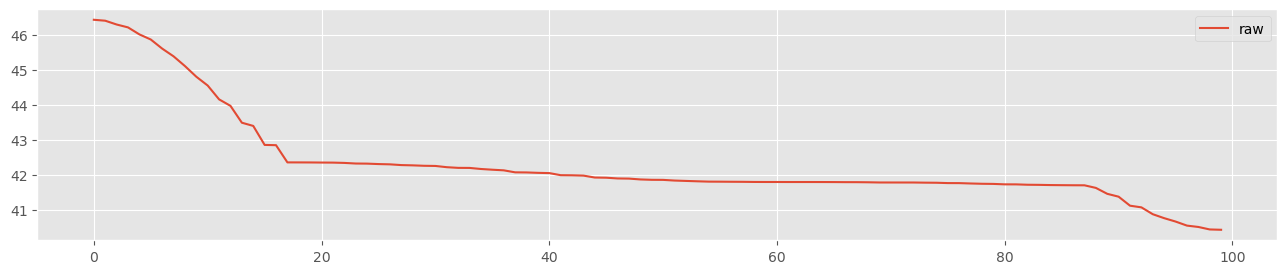

time: 359 ms


In [6]:
# Create raw data with ugly scaling

def create_raw():
    typ = random.choice([ 'a','d'])
    raw = pak.random_series(100, typ, name='raw') 
    raw = pak.scale(raw, 'random')    
    df = pak.dataframe(raw)
    return df


# display
df = create_raw()
print(  'min =',df.raw.min() )
print(  'max =',df.raw.max() )
pak.plot(df)

In [7]:
# show statistics for raw and scaled data

def analyse():
    a = pak.analyse_values(df) #.set_index('col_name')
    spalten = ['col_name','vmin','vmean','vmedian','vmax','vsum']
    a = a[spalten] 
    mask = ~a.col_name.isin(['__index__','x'])
    return a[mask].set_index('col_name')

analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,40.43,42.33,41.86,46.44,4233.02


time: 53.1 ms


## scale method='max_abs'
* scales every value with a fixed factor
* one finds: Every scaled value is somewhere in the range `-1..1`
* series_scaled.max() is often `1`
* series_scaled.min() can be anything `-1..0.999`

In [8]:
# scale
df['max_abs'] = pak.scale( df.raw, 'max_abs')

time: 36.2 ms


In [9]:
# assert
assert (df.max_abs >= -1).all()
assert (df.max_abs <=  1).all()

time: 48.4 ms


array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

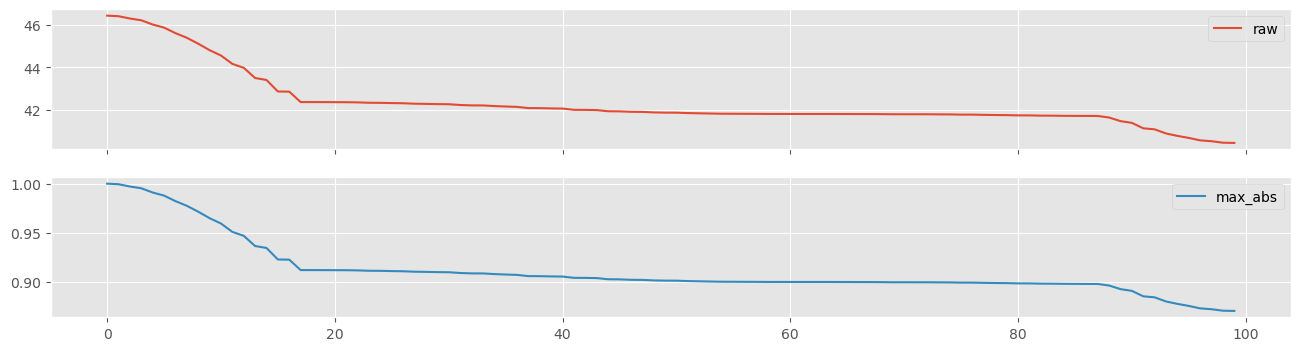

time: 401 ms


In [10]:
# plot
cols = ['raw','max_abs']
pak.plot(df[cols], subplots=True)

In [11]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,40.43,42.33,41.86,46.44,4233.02
max_abs,0.87,0.91,0.90,1.00,91.15


time: 49.6 ms


## scale method='min_max'
* forces all scaled values to fit the full range `0..1` (closed interval)
* one finds: `series_scaled.min() == 0`
* one finds: `series_scaled.max() == 1`

In [12]:
# scale
df['min_max'] = pak.scale( df.raw, 'min_max')

time: 26.7 ms


In [48]:
# assert
assert df.min_max.min() == 0
assert df.min_max.max() == 1

min 0.0
max 1.0
(100, 10)
time: 55.4 ms


array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

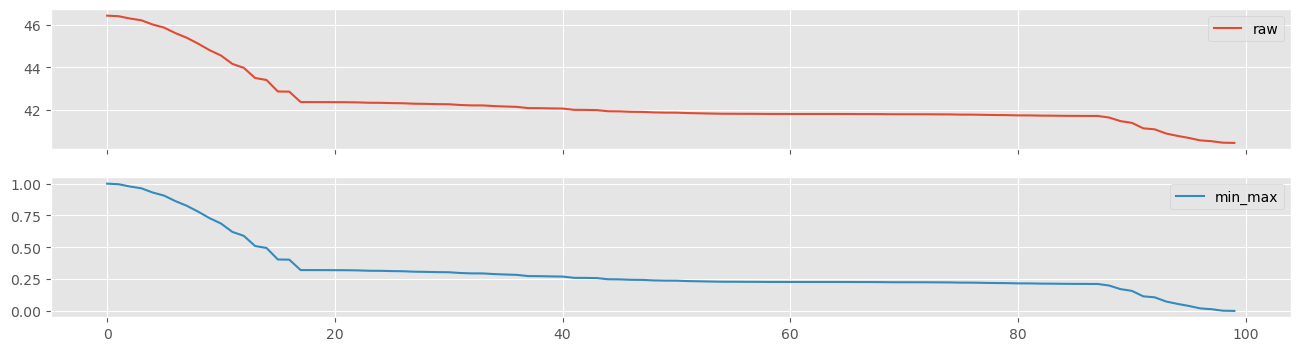

time: 427 ms


In [14]:
# plot
cols = ['raw','min_max']
pak.plot(df[cols], subplots=True)

In [15]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,40.43,42.33,41.86,46.44,4233.02
max_abs,0.87,0.91,0.90,1.00,91.15
min_max,0.00,0.32,0.24,1.00,31.62


time: 58 ms


## scale method='min_max_robust'
* like `min_max`, but robust against outlier values. 
  Works with `quantile(0.01)` and `quantile(0.99)` instead of `min()` and `max()`.
  The scaling is therefore not determined by the outliers.
* scales 98% of the values to fit the range `0..1`
* one finds: `series_scaled.min() <= 0` but not much lower  than -0.02 normally
* one finds: `series_scaled.max() >= 1` but not much higher than  1.02 normally

In [16]:
# scale
df['min_max_robust'] = pak.scale( df.raw, 'min_max_robust')

time: 50.2 ms


In [17]:
# assert
assert df.min_max_robust.min() <= 0
assert df.min_max_robust.max() >= 1

time: 27.9 ms


array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

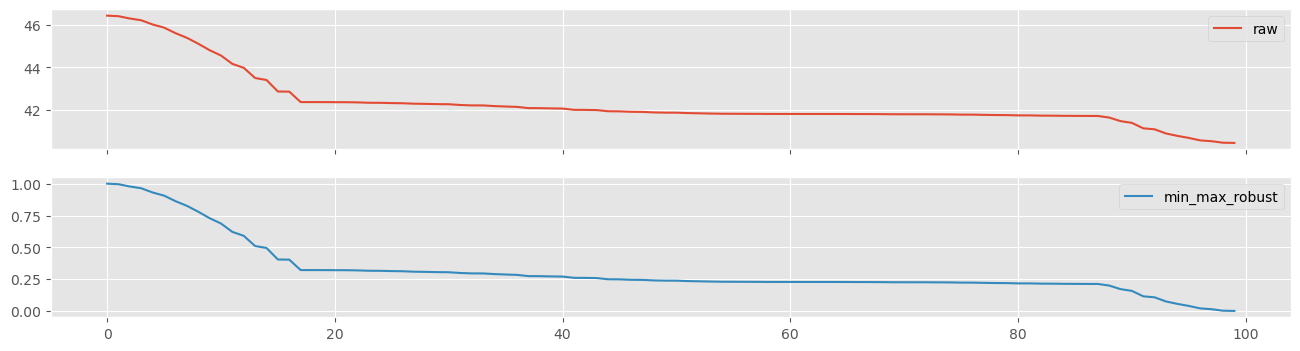

time: 502 ms


In [18]:
# plot
cols = ['raw','min_max_robust']
pak.plot(df[cols], subplots=True)

In [19]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,40.43,42.33,41.86,46.44,4233.02
max_abs,0.87,0.91,0.90,1.00,91.15
min_max,0.00,0.32,0.24,1.00,31.62
min_max_robust,-0.00,0.32,0.24,1.00,31.65


time: 69.7 ms


## scale method='rel'
* scales every value with a fixed factor so that
* `series_scaled.sum() == 1`  or  `series_scaled.sum() == -1` 
* therefore, this scaling is well suited for frequencies, the numerical values are then the relative frequencies
* `series_scaled.min()`  and  `series_scaled.max()` are numbers near `0`

In [20]:
# scale
df['rel'] = pak.scale( df.raw, method='rel')

time: 37.2 ms


In [21]:
# assert
assert abs( abs(df.rel.sum()) - 1 ) < 0.000000001  # .sum() == 1 or -1

time: 37 ms


array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

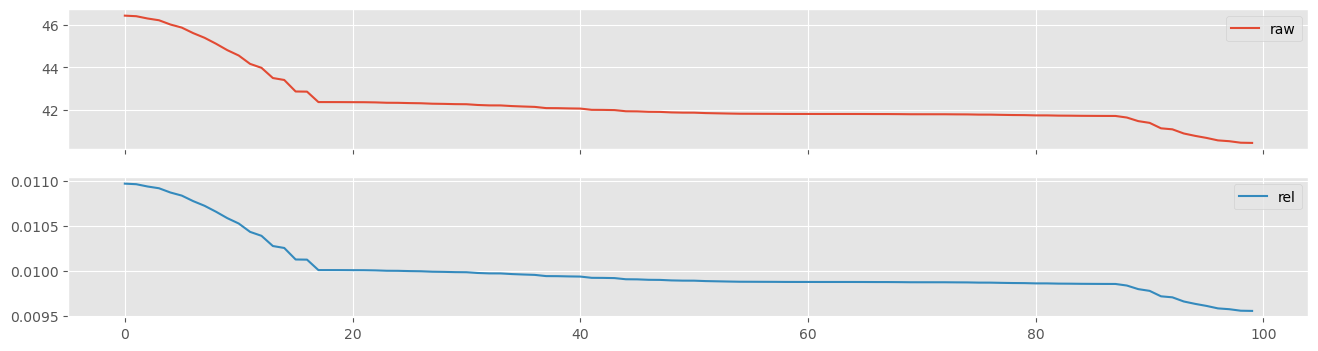

time: 422 ms


In [22]:
# plot
cols = ['raw','rel']
pak.plot(df[cols], subplots=True)

In [23]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,40.43,42.33,41.86,46.44,4233.02
max_abs,0.87,0.91,0.90,1.00,91.15
min_max,0.00,0.32,0.24,1.00,31.62
min_max_robust,-0.00,0.32,0.24,1.00,31.65
rel,0.01,0.01,0.01,0.01,1.00


time: 58.6 ms


## scale method='mean'
* also called z-score
* one finds: `series_scaled.mean() == 0` 
* one finds: `series_scaled.std()  == 1` 
* a typical range for the scaled values is `-1.7..1.7`

In [24]:
# scale
df['mean_'] = pak.scale( df.raw, 'mean')

time: 44.3 ms


In [25]:
# assert
assert abs( df.mean_.mean() )    < 0.000000001   # mean() == 0
assert abs( df.mean_.std() - 1 ) < 0.000000001   # std()  == 1

time: 37.4 ms


array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

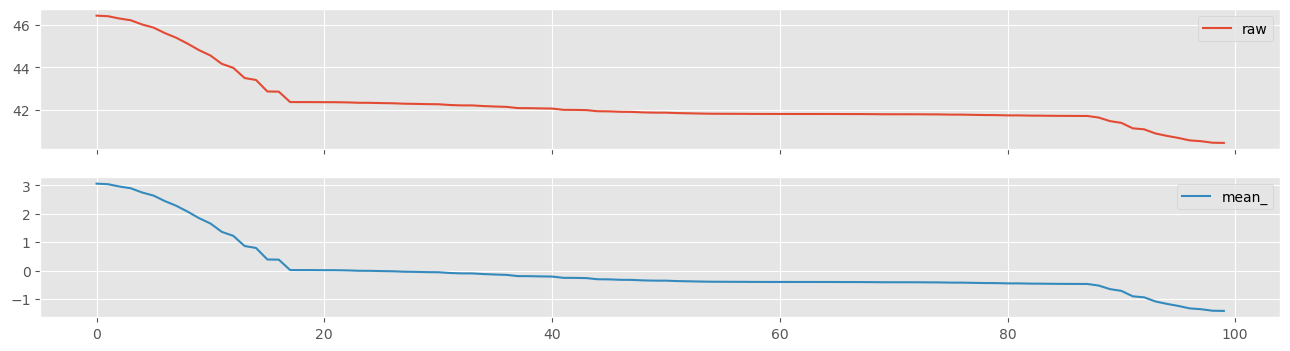

time: 416 ms


In [26]:
# plot
cols = ['raw','mean_']
pak.plot(df[cols], subplots=True)

In [27]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,40.43,42.33,41.86,46.44,4233.02
max_abs,0.87,0.91,0.90,1.00,91.15
min_max,0.00,0.32,0.24,1.00,31.62
min_max_robust,-0.00,0.32,0.24,1.00,31.65
rel,0.01,0.01,0.01,0.01,1.00
mean_,-1.41,0.00,-0.35,3.06,0.00


time: 85.7 ms


## scale method='median'
* like `mean`, but more robust against outliner values.
* one finds: `series_scaled.median() == 0` 
* a typical range for the scaled values is `-1..1`, 
  but the range can be much wider than with `mean`

In [28]:
# scale
df['median_'] = pak.scale( df.raw, 'median')

time: 38.1 ms


In [29]:
# assert
assert abs( df.median_.median() )  < 0.000000001   # median() == 0

time: 32.6 ms


array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

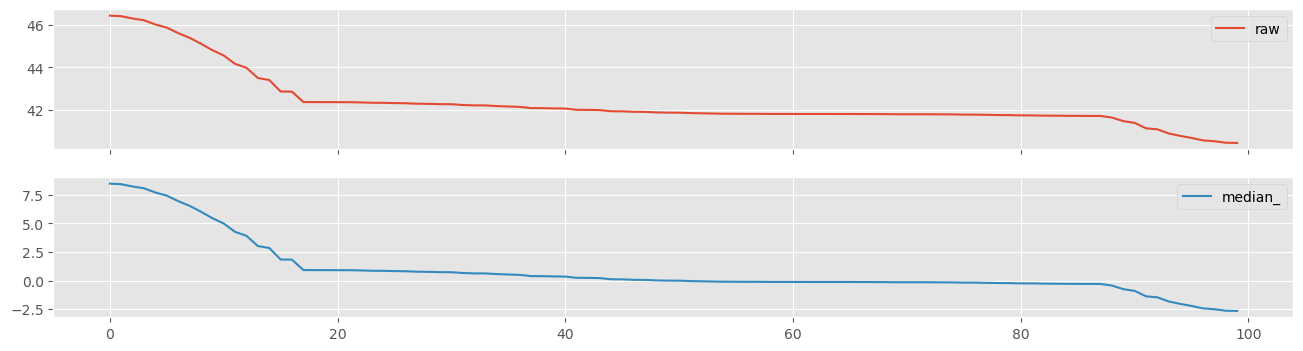

time: 495 ms


In [30]:
# plot
cols = ['raw','median_']
pak.plot(df[cols], subplots=True)

In [31]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,40.43,42.33,41.86,46.44,4233.02
max_abs,0.87,0.91,0.90,1.00,91.15
min_max,0.00,0.32,0.24,1.00,31.62
min_max_robust,-0.00,0.32,0.24,1.00,31.65
rel,0.01,0.01,0.01,0.01,1.00
mean_,-1.41,0.00,-0.35,3.06,0.00
median_,-2.65,0.87,0.00,8.48,87.24


time: 90.2 ms


## scale method='compare_median'
* scales `0..1` below median and `1..` above median 
* So you can multipy the scaled values by any factor, keeping the comparison to the median.
* one finds: all values < median are `0..1`
* one finds: all values == median are `1`
* one finds: all values > median are `> 1`
* `series_scaled.median()` will be very near `1`.
* unlike most other scalings, the plots do not lie on top of each other, but have a different shape

In [32]:
# scale
df['compare_median'] = pak.scale( df.raw, 'compare_median') 

time: 47 ms


In [33]:
# assert
assert df.compare_median.min() == 0

mask = (df.raw > df.raw.median())
assert (df[mask].compare_median > 1).all()

mask = (df.raw == df.raw.median())
assert (df[mask].compare_median == 1).all()

mask = (df.raw < df.raw.median())
assert (df[mask].compare_median <= 1).all()
assert (df[mask].compare_median >= 0).all()

time: 48.6 ms


array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

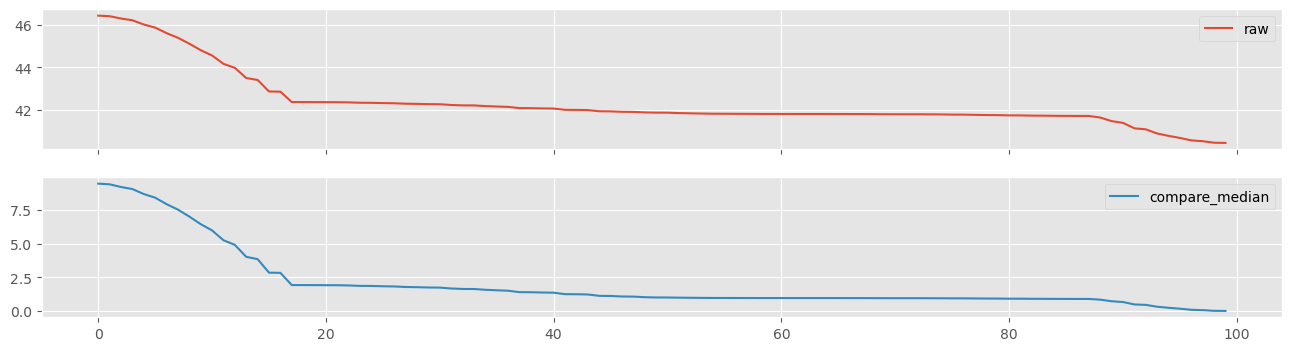

time: 380 ms


In [34]:
# plot
cols = ['raw','compare_median']
pak.plot(df[cols], subplots=True)

In [35]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,40.43,42.33,41.86,46.44,4233.02
max_abs,0.87,0.91,0.90,1.00,91.15
min_max,0.00,0.32,0.24,1.00,31.62
min_max_robust,-0.00,0.32,0.24,1.00,31.65
rel,0.01,0.01,0.01,0.01,1.00
mean_,-1.41,0.00,-0.35,3.06,0.00
median_,-2.65,0.87,0.00,8.48,87.24
compare_median,0.00,2.04,1.00,9.48,204.04


time: 85 ms


## scale method='rank'
* scales `0..1` (open interval)
* scales by rank
* distributes evenly over the interval, the original shape is destroyed. The plots do not lie on top of each other.
* if powerfactor == 1 one finds: `series_scaled.median() == 0.5` 
* additional parameter powerfactor deforms the scale, see example

In [36]:
# scale
df['rank1'] = pak.scale( df.raw, 'rank')

time: 39.5 ms


In [37]:
# assert
assert (df.rank1 > 0).all()
assert (df.rank1 < 1).all()

assert df.rank1.min() < 0.01
assert df.rank1.max() > 0.99
assert abs(df.rank1.quantile(0.5) - 0.5) < 0.02

time: 37.6 ms


array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

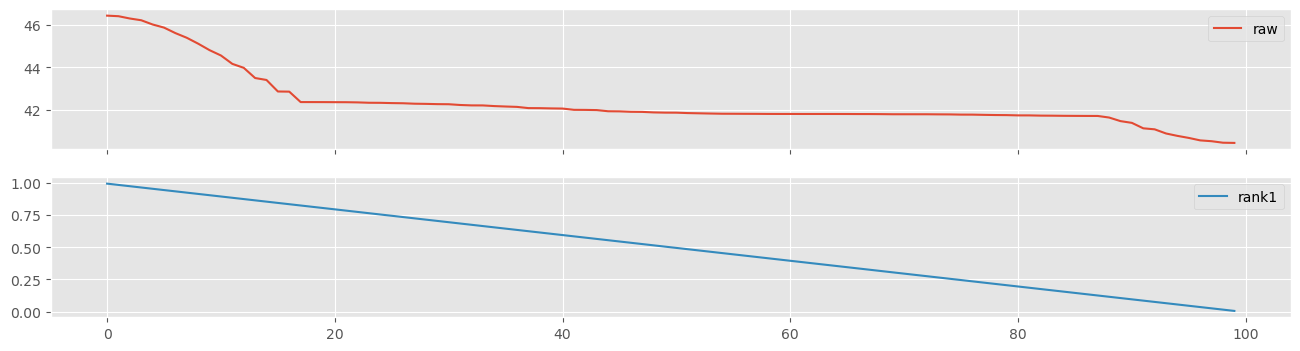

time: 548 ms


In [38]:
# plot
cols = ['raw','rank1']
pak.plot(df[cols], subplots=True)

In [39]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,40.43,42.33,41.86,46.44,4233.02
max_abs,0.87,0.91,0.90,1.00,91.15
min_max,0.00,0.32,0.24,1.00,31.62
min_max_robust,-0.00,0.32,0.24,1.00,31.65
rel,0.01,0.01,0.01,0.01,1.00
mean_,-1.41,0.00,-0.35,3.06,0.00
median_,-2.65,0.87,0.00,8.48,87.24
compare_median,0.00,2.04,1.00,9.48,204.04
rank1,0.01,0.50,0.50,0.99,50.00


time: 64.1 ms


In [40]:
# scale with powerfactor
df['rank3'] = pak.scale( df.raw, 'rank', powerfactor=3)

time: 29.5 ms


In [41]:
# assert
assert (df.rank3 >= 0).all()
assert (df.rank3 <= 1).all()

time: 42.9 ms


array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

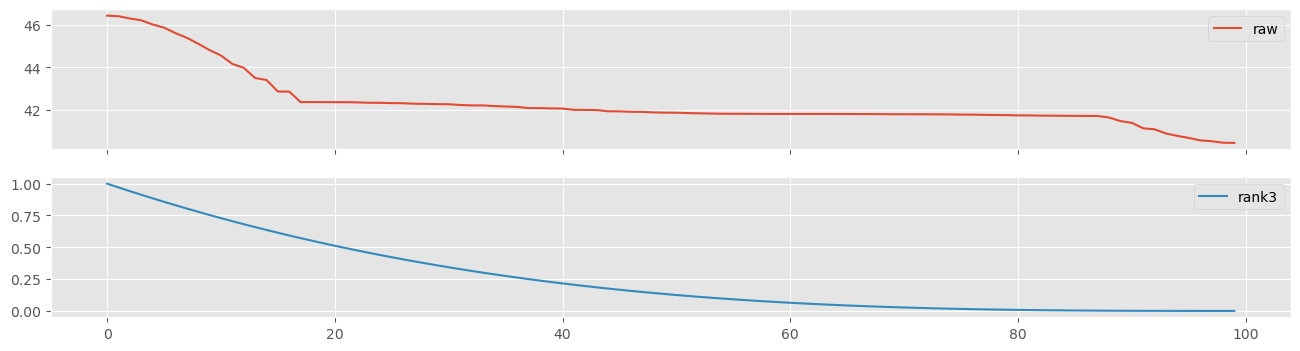

time: 392 ms


In [42]:
# plot
cols = ['raw','rank3']
pak.plot(df[cols], subplots=True)

In [43]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,40.43,42.33,41.86,46.44,4233.02
max_abs,0.87,0.91,0.90,1.00,91.15
min_max,0.00,0.32,0.24,1.00,31.62
min_max_robust,-0.00,0.32,0.24,1.00,31.65
rel,0.01,0.01,0.01,0.01,1.00
mean_,-1.41,0.00,-0.35,3.06,0.00
median_,-2.65,0.87,0.00,8.48,87.24
compare_median,0.00,2.04,1.00,9.48,204.04
rank1,0.01,0.50,0.50,0.99,50.00


time: 63.7 ms


## scale method='random'
* scales randomly
* generates an ugly, krank scaling for testings

## Comparison

<AxesSubplot: >

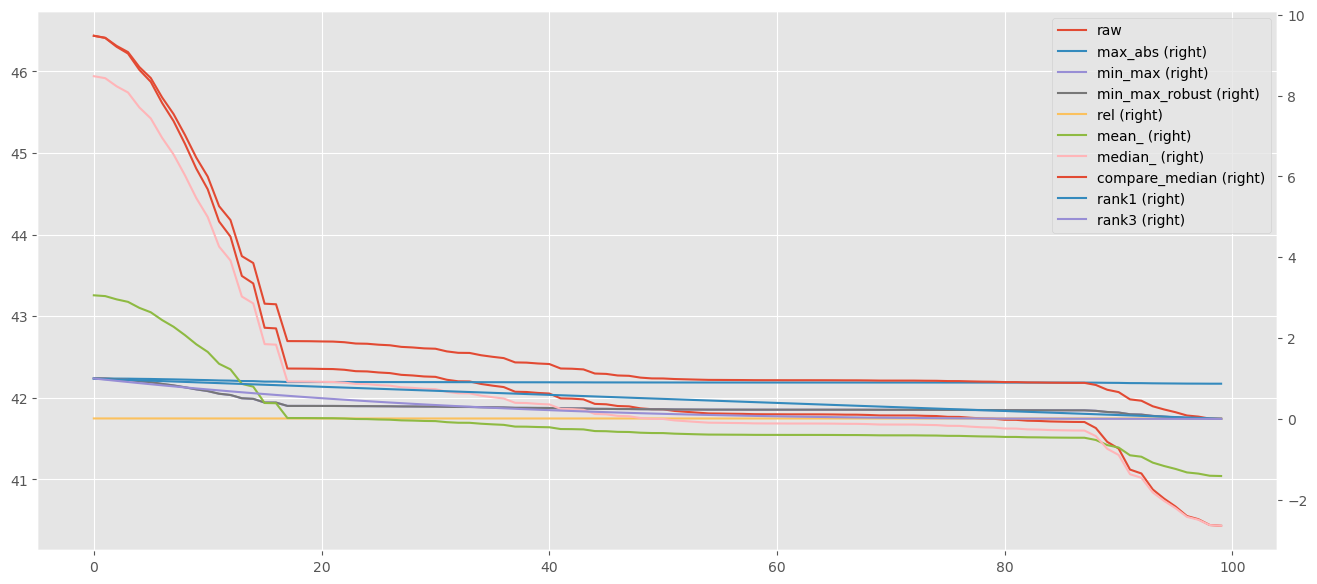

time: 473 ms


In [44]:
# plot
cols = list(df.columns[1:])
pak.plot(df, secondary_y=cols, figsize=(16,7), ylabel='')

<AxesSubplot: xlabel='raw'>

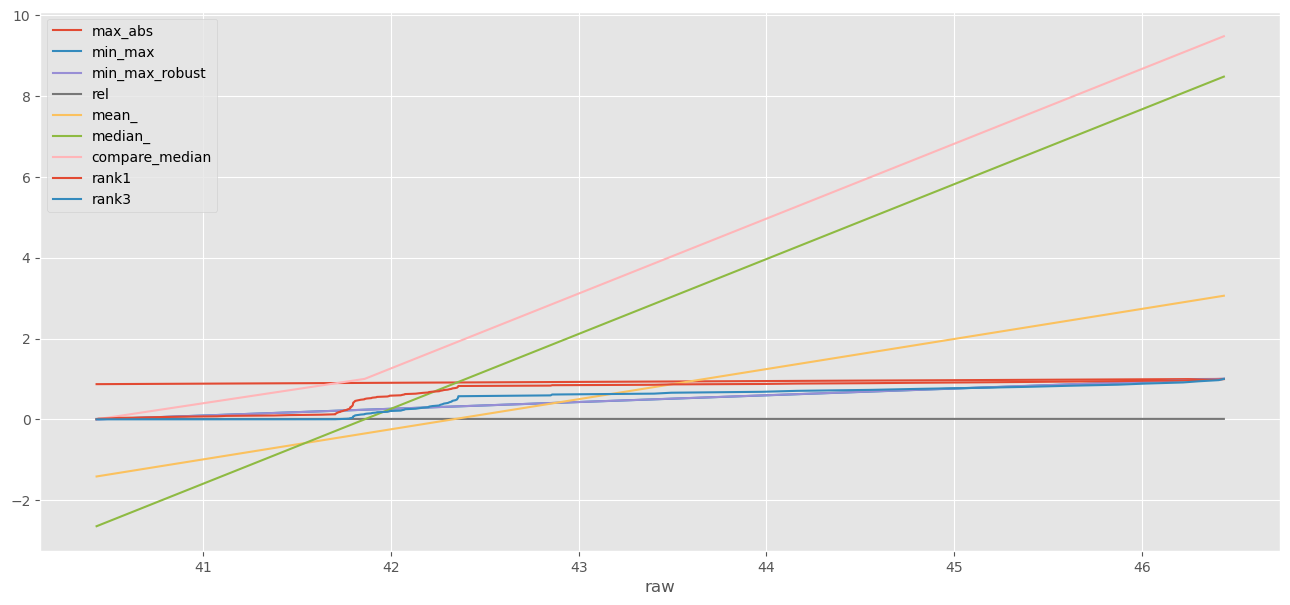

time: 419 ms


In [45]:
# plot
pak.plot(df, x=0, figsize=(16,7))

In [46]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,40.43,42.33,41.86,46.44,4233.02
max_abs,0.87,0.91,0.90,1.00,91.15
min_max,0.00,0.32,0.24,1.00,31.62
min_max_robust,-0.00,0.32,0.24,1.00,31.65
rel,0.01,0.01,0.01,0.01,1.00
mean_,-1.41,0.00,-0.35,3.06,0.00
median_,-2.65,0.87,0.00,8.48,87.24
compare_median,0.00,2.04,1.00,9.48,204.04
rank1,0.01,0.50,0.50,0.99,50.00


time: 76.1 ms
